<a href="https://colab.research.google.com/github/Nikita-ani/The-Spark-Foundation/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 6-prediction using decision tree algorithms
Create the decision tree classifier and visualize it graphically for a given dataset.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:

#import iris dataset
def importdata():
    iris = datasets.load_iris()
    data = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    data.reset_index(inplace=True)
    print("Datset Length",len(data))
    print("Dataset shape",data.shape)
    print("Dataset:",data.head())
    return data

In [5]:
#splitting the dataset
def splitdataset(data):
    x=data.values[:,1:4]
    y=data.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

In [6]:
#training with giniIndex
def trainwithgini(x_train,x_test,y_train):
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [7]:
#training with entropy
def trainwithentropy(x_train,x_test,y_train):
    clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [8]:
#predictions
def prediction(x_test,clf_object):
    #Prediction on test with giniindex
    y_pred=clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [9]:

#calculating accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:",classification_report(y_test,y_pred))

In [10]:
#driver code
def main():
    #building phase
    data=importdata()
    x,y,x_train,x_test,y_train,y_test=splitdataset(data)
    clf_gini=trainwithgini(x_train,x_test,y_train)
    clf_entropy=trainwithentropy(x_train,x_test,y_train)
    #operational phase
    print('\n')
    print("Results using Gini Index:")
    #Prediction with gini
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    #Prediction with entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    cal_accuracy(y_test,y_pred_entropy)

if __name__=="__main__":
    main();

Datset Length 150
Dataset shape (150, 5)
Dataset:    index  sepal length (cm)  ...  petal length (cm)  petal width (cm)
0      0                5.1  ...                1.4               0.2
1      0                4.9  ...                1.4               0.2
2      0                4.7  ...                1.3               0.2
3      0                4.6  ...                1.5               0.2
4      0                5.0  ...                1.4               0.2

[5 rows x 5 columns]


Results using Gini Index:
Predicted values:
[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.91      0.91      0.91        11
         2.0       0.94      0.94      0.94        18

    accuracy   

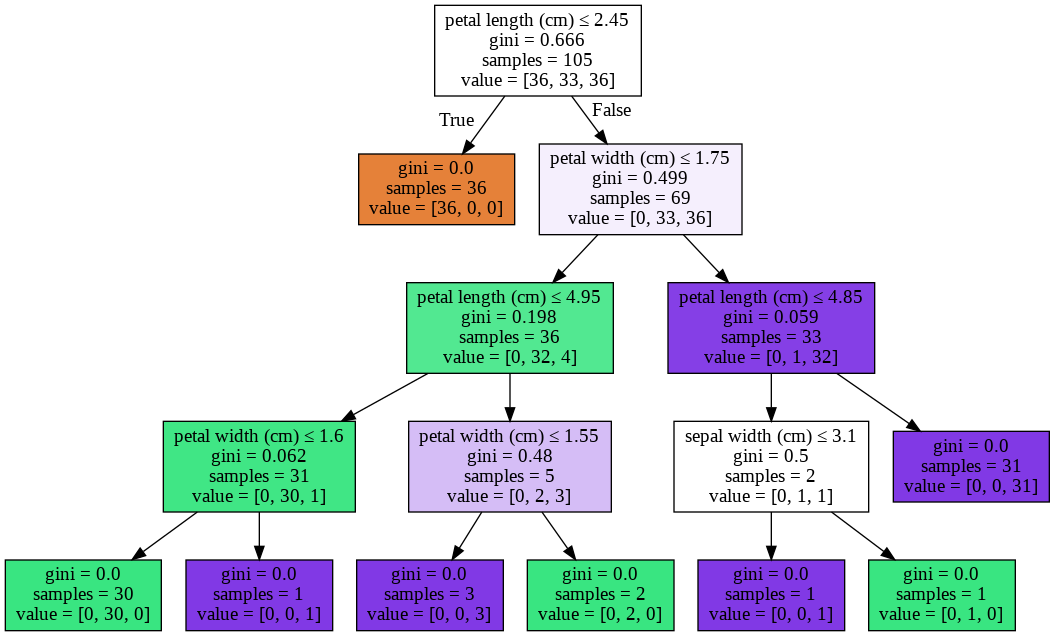

In [11]:
#constructing tree
from io import StringIO ## for Python 3
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=False,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())